# Exploring the Inverse Square Law
###### Justin and Nathaniel

# Abstract

The purpose of this experiment was to reinforce and prove the inverse square law. This law states that light (radiation) does not stay constant over a distance of r but that it falls off at a rate of; \begin{equation} 1/r^2 \end{equation} To experimentally determine the inverse square law, we utilized 2 experiments. Experiment one was "The Confirmation of the Inverse Square Law using Diffraction Gratings" and experiment two "The Inverse Square Law" using the PASCO Thermal Radiation System.

# Intro

Each experiment we ran used a different method to test the inverse square law. The first experiment; "The Confirmation of the Inverse Square Law using Diffraction Gratings", used a two plastic diffraction gratings, a laser, and a ruler (meter stick). The combination of the diffraction gratings, held orthogonal to each other, held in front of the laser in front of the laser resulted in a semi-square shaped grid of dots. Using this grid we found the inverse square law through area.
The next experiment usig the PASCO Thermal Radiation System worked similarly to experiment one but tested the inverse square through direct measurement of the radiation intesisty itself and multiple distances "r".

# Experiment

Experiment 1 "The Confirmation of the Inverse Square Law using Diffraction Gratings";
    For this experiment we had a few pieces equipment, a laser, two equal diffraction gratings, a meter stick and ruler, and a stand to hold the two diffraction gratings. To setup all the equipment we placed the two diffraction gratings orthogonal to one another and held up on the stand. We placed the stand with gratings on a cart that could to varying distances from a chalkboard. We then placed the laser at an appropriate level so that the resulted square grid of red dots would all land on the chalkboard. While shining the laser through the gratings, we moved the cart so the first grid started out relatively small and dimensionally equal/precise to a square. Once the grid was as accurate as we could make it Justin, using the centimeter side of the ruler measured all four sides of two grid squares (one at the top left and one at the top right). Nathaniel then input this data into jupyter notebook to record and plot the data. After measuring the first distance of the diffraction grating from the chalkboard we moved them further from the board to find more "r" values and repeated the process seven times, recieveing fourteen data points in total. 
    
Experiment 2 "Inverse Sqaure Law"
    The equipment used in this experiment was; The PASCO TD-8553 Radiation Sensor, The TD-8555 Stefan-Boltzmann Lammp, a power supply (13V maximum) and a meter stick. The PASCO Radiation sensor measured the relative intensities of incident thermal radiation. To prevent too much interference with our calculations we first measured and ambiant radiation level with all lights in the room turned off. After turning the ligths off we placed the bulb at three locations along the meterstick to find multiple points for our ambiant measurements. We found little to no ambiant radiation. Next we plugged the lamp into the powersource and ramped it up to 10V. To keep the data as precise and accurate as possible we turned the sensor away from the light source. We recieved ten data points along the meter starting at 100cm all the way down to 10cm. Through our collection of data we saw a trend of an increase of the intensity going up exponentially. These data points were a good collection to prove the inverse square law. 

# Data

In [1]:
from astropy import units as u
class Square:
    def __init__(self,s1,s2,s3,s4,dis,region):
        self.s1 = abs(s1)
        self.s2 = abs(s2)
        self.s3 = abs(s3)
        self.s4 = abs(s4)
        self.distance = dis
        self.region = region

data = [Square(5.65,5.65,5.1,5.45,13.85,'left'),Square(5.34,5.4,4.95,5.19,13.85,'right'),
        Square(10.15,8.95,9.45,9.81,24.35,'left'),Square(9.35,9.49,9.25,8.9,24.35,'right'),
        Square(13.8,14.1,12.6,13.25,34.49,'left'),Square(13.25,13.3,12.35,12.5,34.49,'right'),
        Square(20.45,20.19,18.55,19.55,51.1,'left'),Square(19.6,19.6,18.35,18.8,51.1,'right'),
        Square(28.55,29.5,26.05,27.35,70.25,'left'),Square(27.49,27.59,25.65,26.05,70.25,'right'),
        Square(71.9-40,50-17.05,39.1-10,40.55-10,80.5,'left'),Square(10-40.6,80-49.2,10-38.55,70-40.9,80.5,'right'),
        Square(25.01,25.9,22.89,24.05,100-37.9,'left'),Square(24.05,24.15,22.4,22.85,100-37.9,'right')] #(cm,cm,cm,cm,cm)

ambiant = [{'distance':100,'volts':0.1},{'distance':50,'volts':0.1},
           {'distance':20,'volts':0.1}]#(cm,mV)
actual = [{'distance':100,'volts':0.3},{'distance':90.2,'volts':0.3},
          {'distance':79,'volts':0.4},{'distance':69.9,'volts':0.45},
          {'distance':59.5,'volts':0.6},{'distance':50,'volts':0.7},
          {'distance':40,'volts':0.9},{'distance':29.8,'volts':1.6},
          {'distance':19.9,'volts':3.1},{'distance':10.9,'volts':9.6}]#(cm,mV)

# Calculations

In [2]:
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b, c):
    return a*x**2 + b*x + c

Since we measured the length of all four sides of our squares, we'll use the Brahmagupta Formula to approximate the area of the squares. The Brahmagupta's Formula given by:
\begin{equation}
area = \sqrt{(s-a)(s-b)(s-c)(s-d)}
\end{equation}
Where a,b,c, and d are the sides of a cyclic quadrilateral and s is given by:
\begin{equation}
s = \frac{a+b+c+d}{2}
\end{equation}

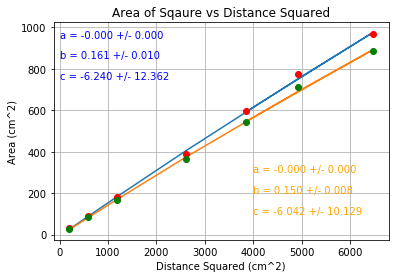

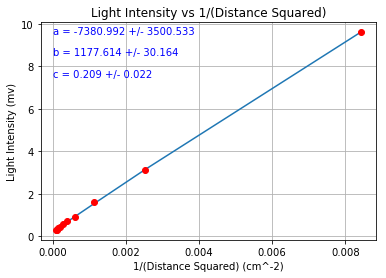

In [3]:
# Laser part
def area(square):
    a = square.s1
    b = square.s2
    c = square.s3
    d = square.s4
    s = (a+b+c+d)/2
    return ((s-a)*(s-b)*(s-c)*(s-d))**0.5

areas_left = []
areas_right = []
distances_left = []
distances_right = []
for d in data:
    if d.region == 'left':
        areas_left.append(area(d))
        distances_left.append(d.distance**2)
    else:
        areas_right.append(area(d))
        distances_right.append(d.distance**2)

fig1 = plt.figure()
exp1 = fig1.add_subplot(111)

popt1, pcov1 = curve_fit(func, distances_left, areas_left)
exp1.plot(distances_left, np.polyval(popt1, distances_left), '-')

popt2, pcov2 = curve_fit(func, distances_right, areas_right)
exp1.plot(distances_right, np.polyval(popt2, distances_right), '-')

exp1.text(10, 950, r"a = {0:.3f} +/- {1:.3f}".format(popt1[0], pcov1[0,0]**0.5),color="blue")
exp1.text(10, 850, r"b = {0:.3f} +/- {1:.3f}".format(popt1[1], pcov1[1,1]**0.5),color="blue")
exp1.text(10, 750, r"c = {0:.3f} +/- {1:.3f}".format(popt1[2], pcov1[2,2]**0.5),color="blue")
exp1.grid()

exp1.text(4000, 300, r"a = {0:.3f} +/- {1:.3f}".format(popt2[0], pcov2[0,0]**0.5),color="orange")
exp1.text(4000, 200, r"b = {0:.3f} +/- {1:.3f}".format(popt2[1], pcov2[1,1]**0.5),color="orange")
exp1.text(4000, 100, r"c = {0:.3f} +/- {1:.3f}".format(popt2[2], pcov2[2,2]**0.5),color="orange")

exp1.plot(distances_left, areas_left, 'ro')
exp1.plot(distances_right,areas_right,  'go')
plt.title("Area of Sqaure vs Distance Squared")
plt.xlabel("Distance Squared (cm^2)")
plt.ylabel("Area (cm^2)")


# Lightbulb part
fig2 = plt.figure()
exp2 = fig2.add_subplot(111)

distance = []
volts = []
for a in actual:
    distance.append((a['distance']**-2))
    volts.append(a['volts'])

popt3, pcov3 = curve_fit(func, distance, volts)
exp2.plot(distance, np.polyval(popt3, distance), '-')
exp2.text(0, 9.5, r"a = {0:.3f} +/- {1:.3f}".format(popt3[0], pcov3[0,0]**0.5),color="blue")
exp2.text(0, 8.5, r"b = {0:.3f} +/- {1:.3f}".format(popt3[1], pcov3[1,1]**0.5),color="blue")
exp2.text(0, 7.5, r"c = {0:.3f} +/- {1:.3f}".format(popt3[2], pcov3[2,2]**0.5),color="blue")
exp2.grid()

exp2.plot(distance, volts, 'ro')
plt.title("Light Intensity vs 1/(Distance Squared)")
plt.xlabel("1/(Distance Squared) (cm^-2)")
plt.ylabel("Light Intensity (mv)")

plt.show()

# Conclusion

<p>Our first expirement yielded the best results. With the area of the squares plotted vs the distance squared we achieved a linear relationship. Which implies that the area is directly proportional to the distance squared. The area is inversely proportional to what the light intensity would be since you would have the same amount of light over the larger area. Given that, the light intensity would be inversely proportional to the distance squared which is what we set out to prove in this lab.</p>
<p>The second expirment was a more direct measurement. Since we measured the light intensity we would expect it to be proportional to 1/r^2 but we have a weird artifact. Our best fit line gives a non-zero coefficient for the x^2 term which implies that there is not a direct relationship between the intensity and 1/r^2. This might be explained from the graph. A large number of our data points are clustered near (0,0). Any uncertainty in these values could be quite large as a percentage. The line looks mostly linear once we start getting sizable gaps between our points.</p>